## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Handling Imbalance Dataset
## --> 4. Feature Extraction (PCA) / Component Selection (16)
## --> 5. Data Cleaning (Removing 0 class) 
## --> 6. Normalization (Z Score Normalization)
## --> 7. Train Test Splitting (70% Train , 30% Test)
## --> 8. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 9. Find Training Accuracy
## --> 10. Testing Accuracy

# 1. Load Dataset

### Import Library

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [85]:
#import the package
from spectral import *

In [86]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [87]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [88]:
data.shape

(145, 145, 220)

In [89]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [90]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [91]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [92]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [93]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [94]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [95]:
ground_truth_data.shape

(145, 145)

In [96]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [97]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [98]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [99]:
df = pd.DataFrame(dictionary)

In [100]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

In [101]:
target


array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [102]:
target.shape


(21025,)

In [103]:
df['target'] = target
df


band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

# 3. Handling Imbalance Dataset

In [104]:
df['target'].value_counts()


0     10659
11     2468
2      1434
14     1294
10      968
3       834
6       747
12      614
5       497
8       489
15      380
4       234
13      212
16       95
1        54
7        26
9        20
Name: target, dtype: int64

from here it is clear that class no 16 , 1 , 7 and 9 have less number of samples.

In [105]:
total = df['target'].value_counts().sum() - df['target'].value_counts()[0]
total

10366

In [106]:
# total number of extra data
num_of_data_to_be_added = 20000
num_of_data_to_be_added


20000

### functions to generate synthetic samples

In [107]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def generate_synthetic_samples(original_samples, num_samples_to_generate, k_neighbors=5):
    # Create a Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k_neighbors)
    nn_model.fit(original_samples)

    synthetic_samples = []

    while len(synthetic_samples) < num_samples_to_generate:
        # Choose a random sample from the minority class
        random_sample_idx = np.random.randint(0, len(original_samples))
        random_sample = original_samples[random_sample_idx]

        # Find the k nearest neighbors of the random sample
        _, neighbors_idx = nn_model.kneighbors([random_sample], n_neighbors=k_neighbors)
        neighbors = original_samples[neighbors_idx[0]]

        # Calculate the mean feature values of neighbors
        mean_features = np.mean(neighbors, axis=0)

        # Create a synthetic sample using feature interpolation
        synthetic_sample = random_sample + np.random.uniform(-0.5, 0.5) * (mean_features - random_sample)
        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)


In [108]:
names = []
st = 'band_'
for i in range(220):
    names.append(st+str(i+1))

for i in range(1,17):
    original_samples_class_i = df[df['target'] == i].drop('target', axis=1)
    num_samples_to_generate_class_i = int( len(original_samples_class_i) * num_of_data_to_be_added / total)
    synthetic_samples_class_i = generate_synthetic_samples(original_samples_class_i.values, num_samples_to_generate_class_i)
    synthetic_samples_class_i = pd.DataFrame(data=synthetic_samples_class_i, columns=names)
    synthetic_samples_class_i['target'] = i
    df = df.append(synthetic_samples_class_i, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15764\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15764\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15764\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15764\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sy

### Final df

In [109]:
df


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3811.405276  4921.836720  5397.492684  5350.183660  5964.157415   
41014  3704.430388  4779.622926  5169.113467  5169.438391  5628.107160   
41015  3686.316137  5012.377999  5172.673500  5181.740882  5639.901485   
41016  3676.167600  4630.980611  4882.119775  4875.117621  5391.059888   
41017  3871.688201  4777.915446  5253.816239  5273.387218  5741.989915   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6502.883366  6748.921263  6695.874618  6580.151608  6477.262378  ...   
41014  6134.850442  6395.371350  6289.987969  6300.319783  6131.472786  ...   
41015  6073.404244  6275.025975  6216.854919  6178.259118  5970.901575  ...   
41016  5848.654459  5928.887547  5765.475225  5915.986212  5666.906936  ...   
41017  6255.115066  6648.284649  6551.832572  6550.081193  6328.586838  ...   

          band_212     band_213     band_214     band_215     band_216  \
0      1090.000000  1112.000000  1090.000000  1062.000000  1069.000000   
1      1104.000000  1117.000000  1091.000000  1079.000000  1085.000000   
2      1114.000000  1114.000000  1100.000000  1065.000000  1092.000000   
3      1108.000000  1109.000000  1109.000000  1071.000000  1088.000000   
4      1107.000000  1112.000000  1094.000000  1072.000000  1087.000000   
...            ...          ...          ...          ...          ...   
41013  1083.346940  1087.268223  1084.125363  1066.889211  1069.574343   
41014  1108.843553  1111.061318  1093.748423  1069.705443  1070.260745   
41015  1081.217621  1086.217621  1074.031089  1050.373065  1060.227984   
41016  1089.109866  1102.100819  1074.436019  1052.198190  1054.563981   
41017  1089.718712  1092.746337  1062.097526  1060.507326  1047.843863   

          band_217     band_218     band_219     band_220  target  
0      1057.000000  1020.000000  1020.000000  1005.000000       3  
1      1064.000000  1029.000000  1020.000000  1000.000000       3  
2      1061.000000  1030.000000  1016.000000  1009.000000       3  
3      1060.000000  1030.000000  1006.000000  1005.000000       3  
4      1052.000000  1034.000000  1019.000000  1019.000000       3  
...            ...          ...          ...          ...     ...  
41013  1039.921283  1036.620989  1014.685131  1007.055394      16  
41014  1056.705443  1026.886533  1018.383380  1005.668769      16  
41015  1049.803104  1028.865282  1011.145081  1007.896371      16  
41016  1042.079276  1035.347695  1021.189143  1015.990952      16  
41017  1038.957723  1019.957723  1021.691088  1007.943070      16  

[41018 rows x 221 columns]

In [110]:
df['target'].value_counts()


0     10659
11     7229
2      4200
14     3790
10     2835
3      2443
6      2188
12     1798
5      1455
8      1432
15     1113
4       685
13      621
16      278
1       158
7        76
9        58
Name: target, dtype: int64

In [111]:
# df = df.sample(frac=1, random_state=np.random.seed())
# df


In [112]:
target = df['target']
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [113]:
df = df.drop('target',axis=1)
df

band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3811.405276  4921.836720  5397.492684  5350.183660  5964.157415   
41014  3704.430388  4779.622926  5169.113467  5169.438391  5628.107160   
41015  3686.316137  5012.377999  5172.673500  5181.740882  5639.901485   
41016  3676.167600  4630.980611  4882.119775  4875.117621  5391.059888   
41017  3871.688201  4777.915446  5253.816239  5273.387218  5741.989915   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6502.883366  6748.921263  6695.874618  6580.151608  6477.262378  ...   
41014  6134.850442  6395.371350  6289.987969  6300.319783  6131.472786  ...   
41015  6073.404244  6275.025975  6216.854919  6178.259118  5970.901575  ...   
41016  5848.654459  5928.887547  5765.475225  5915.986212  5666.906936  ...   
41017  6255.115066  6648.284649  6551.832572  6550.081193  6328.586838  ...   

          band_211     band_212     band_213     band_214     band_215  \
0      1094.000000  1090.000000  1112.000000  1090.000000  1062.000000   
1      1108.000000  1104.000000  1117.000000  1091.000000  1079.000000   
2      1111.000000  1114.000000  1114.000000  1100.000000  1065.000000   
3      1122.000000  1108.000000  1109.000000  1109.000000  1071.000000   
4      1110.000000  1107.000000  1112.000000  1094.000000  1072.000000   
...            ...          ...          ...          ...          ...   
41013  1092.551020  1083.346940  1087.268223  1084.125363  1066.889211   
41014  1108.634957  1108.843553  1111.061318  1093.748423  1069.705443   
41015  1095.865282  1081.217621  1086.217621  1074.031089  1050.373065   
41016  1105.140457  1089.109866  1102.100819  1074.436019  1052.198190   
41017  1098.887821  1089.718712  1092.746337  1062.097526  1060.507326   

          band_216     band_217     band_218     band_219     band_220  
0      1069.000000  1057.000000  1020.000000  1020.000000  1005.000000  
1      1085.000000  1064.000000  1029.000000  1020.000000  1000.000000  
2      1092.000000  1061.000000  1030.000000  1016.000000  1009.000000  
3      1088.000000  1060.000000  1030.000000  1006.000000  1005.000000  
4      1087.000000  1052.000000  1034.000000  1019.000000  1019.000000  
...            ...          ...          ...          ...          ...  
41013  1069.574343  1039.921283  1036.620989  1014.685131  1007.055394  
41014  1070.260745  1056.705443  1026.886533  1018.383380  1005.668769  
41015  1060.227984  1049.803104  1028.865282  1011.145081  1007.896371  
41016  1054.563981  1042.079276  1035.347695  1021.189143  1015.990952  
41017  1047.843863  1038.957723  1019.957723  1021.691088  1007.943070  

[41018 rows x 220 columns]

# 4. Feature Extraction (PCA) / Component Selection

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
pca.fit(df)
x_pca = pca.transform(df)
x_pca

array([[ 3.86478274e+03,  2.02023929e+03,  2.66035649e+02, ...,
         2.44632203e+01, -4.97300157e+00, -1.60201936e+01],
       [ 4.50403262e+03, -1.53420842e+03,  5.91845340e+02, ...,
         1.80504977e+01, -8.48024776e+00, -1.45076773e+01],
       [ 4.73101231e+03, -2.60720065e+03,  6.23082152e+02, ...,
         3.09885812e+00,  2.66182593e+01,  5.87097106e+00],
       ...,
       [ 7.85590997e+03, -1.46924244e+03,  3.51478343e+03, ...,
         2.73859192e+01,  2.93156869e+01, -8.45476590e+00],
       [ 6.36197181e+03, -1.41524465e+03,  2.41058878e+03, ...,
         2.99336608e+01, -4.06434829e+01,  1.76598534e+01],
       [ 9.68834518e+03, -2.58586992e+03,  4.51039206e+03, ...,
        -1.79237535e+00, -1.85957371e+01, -4.11762834e+01]])

In [115]:
pca.explained_variance_ratio_

array([7.18226785e-01, 2.55482049e-01, 1.56135137e-02, 3.34939249e-03,
       1.93091165e-03, 1.36295993e-03, 7.16375460e-04, 3.71235944e-04,
       3.14056565e-04, 2.24182236e-04, 1.73255111e-04, 1.41582409e-04,
       1.39759165e-04, 1.03090905e-04, 8.78222565e-05, 8.56851464e-05,
       6.62446594e-05, 6.08244663e-05, 5.61873367e-05, 5.13887620e-05,
       4.81225513e-05, 4.52934207e-05, 4.38401228e-05, 4.29253495e-05,
       4.18722711e-05, 4.10139637e-05, 3.90462710e-05, 3.82689730e-05,
       3.75805457e-05, 3.56439998e-05, 3.46609333e-05, 3.38954612e-05,
       3.27796932e-05, 3.27275350e-05, 3.22243726e-05, 3.14238096e-05,
       3.07293156e-05, 2.82698014e-05, 2.72162235e-05, 2.47988379e-05,
       2.31302279e-05, 2.29245481e-05, 2.01707512e-05, 1.94775989e-05,
       1.84316286e-05, 1.65821591e-05, 1.62169329e-05, 1.61370141e-05,
       1.44502812e-05, 1.39027705e-05, 1.34725670e-05, 1.20809439e-05,
       1.18732291e-05, 1.09558728e-05, 1.08666376e-05, 1.06862075e-05,
      

In [116]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.71822679, 0.97370883, 0.98932235, 0.99267174, 0.99460265,
       0.99596561, 0.99668199, 0.99705322, 0.99736728, 0.99759146,
       0.99776472, 0.9979063 , 0.99804606, 0.99814915, 0.99823697,
       0.99832266, 0.9983889 , 0.99844973, 0.99850591, 0.9985573 ,
       0.99860542, 0.99865072, 0.99869456, 0.99873748, 0.99877936,
       0.99882037, 0.99885942, 0.99889769, 0.99893527, 0.99897091,
       0.99900557, 0.99903947, 0.99907225, 0.99910497, 0.9991372 ,
       0.99916862, 0.99919935, 0.99922762, 0.99925484, 0.99927964,
       0.99930277, 0.99932569, 0.99934586, 0.99936534, 0.99938377,
       0.99940035, 0.99941657, 0.99943271, 0.99944716, 0.99946106,
       0.99947453, 0.99948661, 0.99949849, 0.99950944, 0.99952031,
       0.999531  , 0.99954142, 0.99955158, 0.99956141, 0.9995711 ])

In [117]:
print(df.shape)
print(x_pca.shape)

(41018, 220)
(41018, 60)


In [118]:
df = pd.DataFrame(data=x_pca)
df

0            1            2            3           4   \
0      3864.782736  2020.239295   266.035649  -157.454206  -58.355021   
1      4504.032625 -1534.208415   591.845340  -127.435437  132.678488   
2      4731.012309 -2607.200654   623.082152  -116.803571   72.161805   
3      4501.317132 -1887.057907   588.940493  -111.555262   66.508647   
4      3853.224195   806.445624   207.428600  -107.806853  -84.917432   
...            ...          ...          ...          ...         ...   
41013  9824.805838 -2581.934163  5000.919277  1394.196984 -398.268732   
41014  9220.883446 -4610.024752  3260.731995   635.115883  -78.446612   
41015  7855.909967 -1469.242438  3514.783433  1118.809131 -139.567477   
41016  6361.971812 -1415.244646  2410.588784   661.217079 -115.942405   
41017  9688.345183 -2585.869918  4510.392056  1240.048098 -183.747141   

               5           6           7          8           9   ...  \
0      -95.788418  231.373373   73.099528  24.157355   85.705291  ...   
1     -142.915025  102.654643   18.043821  11.069775  -16.982483  ...   
2      -86.798473 -187.767469   69.907305 -11.850993 -168.673375  ...   
3       11.490346  -12.669904   74.822714  -7.486542   13.424162  ...   
4       58.109392  -70.339484  220.147338 -43.799224  207.268038  ...   
...           ...         ...         ...        ...         ...  ...   
41013  255.815234  278.582418  152.231464 -61.204122  -20.747093  ...   
41014  -31.766155  126.098284   18.714759 -34.644324   -0.088969  ...   
41015  400.082502  215.373626 -217.586329 -19.970193  105.999860  ...   
41016  264.078663   88.591441    3.892827  -8.507502   -3.215865  ...   
41017  120.767852  109.322266  176.115039 -66.400683  -32.925301  ...   

              50         51         52         53         54         55  \
0      17.301753 -11.137689  32.373407   2.631953 -34.899871  21.442758   
1      17.868689 -23.432162  -9.630553  19.384315  12.291861  38.636950   
2       4.794343  11.439060 -13.014303 -15.954600   7.282690  17.889978   
3       0.331194  24.112111 -16.129748 -15.543216  19.176128   4.820358   
4       7.105613  13.280928  -4.755733   5.742115 -26.022896  -4.540973   
...          ...        ...        ...        ...        ...        ...   
41013  24.321184 -91.920663  -7.234362  30.683049  -7.053319   6.864111   
41014 -10.165652  -4.253834 -27.487179  -3.275832  -0.971831 -14.514048   
41015  19.934389  -7.140807  -6.760662 -27.153156 -25.494340 -28.465802   
41016  54.060614 -23.595214  29.735312   6.524142 -18.392085  27.153003   
41017  47.938556 -41.931446 -28.880958 -27.320038 -10.489578 -21.922116   

              56         57         58         59  
0       3.253951  24.463220  -4.973002 -16.020194  
1       1.856377  18.050498  -8.480248 -14.507677  
2      19.970444   3.098858  26.618259   5.870971  
3     -17.299065   2.273707  26.961479  25.666753  
4      -8.419274  -0.991762  16.844461  -3.632485  
...          ...        ...        ...        ...  
41013 -38.540681  -3.191456  34.966063  11.739085  
41014  24.510724   2.890816  19.818966   1.263539  
41015   1.398105  27.385919  29.315687  -8.454766  
41016  25.928073  29.933661 -40.643483  17.659853  
41017  -6.002245  -1.792375 -18.595737 -41.176283  

[41018 rows x 60 columns]

In [119]:
target

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 41018, dtype: int64

In [120]:
target.shape

(41018,)

In [121]:
df['target'] = target
df

0            1            2            3           4  \
0      3864.782736  2020.239295   266.035649  -157.454206  -58.355021   
1      4504.032625 -1534.208415   591.845340  -127.435437  132.678488   
2      4731.012309 -2607.200654   623.082152  -116.803571   72.161805   
3      4501.317132 -1887.057907   588.940493  -111.555262   66.508647   
4      3853.224195   806.445624   207.428600  -107.806853  -84.917432   
...            ...          ...          ...          ...         ...   
41013  9824.805838 -2581.934163  5000.919277  1394.196984 -398.268732   
41014  9220.883446 -4610.024752  3260.731995   635.115883  -78.446612   
41015  7855.909967 -1469.242438  3514.783433  1118.809131 -139.567477   
41016  6361.971812 -1415.244646  2410.588784   661.217079 -115.942405   
41017  9688.345183 -2585.869918  4510.392056  1240.048098 -183.747141   

                5           6           7          8           9  ...  \
0      -95.788418  231.373373   73.099528  24.157355   85.705291  ...   
1     -142.915025  102.654643   18.043821  11.069775  -16.982483  ...   
2      -86.798473 -187.767469   69.907305 -11.850993 -168.673375  ...   
3       11.490346  -12.669904   74.822714  -7.486542   13.424162  ...   
4       58.109392  -70.339484  220.147338 -43.799224  207.268038  ...   
...           ...         ...         ...        ...         ...  ...   
41013  255.815234  278.582418  152.231464 -61.204122  -20.747093  ...   
41014  -31.766155  126.098284   18.714759 -34.644324   -0.088969  ...   
41015  400.082502  215.373626 -217.586329 -19.970193  105.999860  ...   
41016  264.078663   88.591441    3.892827  -8.507502   -3.215865  ...   
41017  120.767852  109.322266  176.115039 -66.400683  -32.925301  ...   

              51         52         53         54         55         56  \
0     -11.137689  32.373407   2.631953 -34.899871  21.442758   3.253951   
1     -23.432162  -9.630553  19.384315  12.291861  38.636950   1.856377   
2      11.439060 -13.014303 -15.954600   7.282690  17.889978  19.970444   
3      24.112111 -16.129748 -15.543216  19.176128   4.820358 -17.299065   
4      13.280928  -4.755733   5.742115 -26.022896  -4.540973  -8.419274   
...          ...        ...        ...        ...        ...        ...   
41013 -91.920663  -7.234362  30.683049  -7.053319   6.864111 -38.540681   
41014  -4.253834 -27.487179  -3.275832  -0.971831 -14.514048  24.510724   
41015  -7.140807  -6.760662 -27.153156 -25.494340 -28.465802   1.398105   
41016 -23.595214  29.735312   6.524142 -18.392085  27.153003  25.928073   
41017 -41.931446 -28.880958 -27.320038 -10.489578 -21.922116  -6.002245   

              57         58         59  target  
0      24.463220  -4.973002 -16.020194       3  
1      18.050498  -8.480248 -14.507677       3  
2       3.098858  26.618259   5.870971       3  
3       2.273707  26.961479  25.666753       3  
4      -0.991762  16.844461  -3.632485       3  
...          ...        ...        ...     ...  
41013  -3.191456  34.966063  11.739085      16  
41014   2.890816  19.818966   1.263539      16  
41015  27.385919  29.315687  -8.454766      16  
41016  29.933661 -40.643483  17.659853      16  
41017  -1.792375 -18.595737 -41.176283      16  

[41018 rows x 61 columns]

# 5. Data Cleaning (Removing 0 class) 

In [122]:
df = df[df['target']!=0]

In [123]:
df

0            1            2            3           4  \
0      3864.782736  2020.239295   266.035649  -157.454206  -58.355021   
1      4504.032625 -1534.208415   591.845340  -127.435437  132.678488   
2      4731.012309 -2607.200654   623.082152  -116.803571   72.161805   
3      4501.317132 -1887.057907   588.940493  -111.555262   66.508647   
4      3853.224195   806.445624   207.428600  -107.806853  -84.917432   
...            ...          ...          ...          ...         ...   
41013  9824.805838 -2581.934163  5000.919277  1394.196984 -398.268732   
41014  9220.883446 -4610.024752  3260.731995   635.115883  -78.446612   
41015  7855.909967 -1469.242438  3514.783433  1118.809131 -139.567477   
41016  6361.971812 -1415.244646  2410.588784   661.217079 -115.942405   
41017  9688.345183 -2585.869918  4510.392056  1240.048098 -183.747141   

                5           6           7          8           9  ...  \
0      -95.788418  231.373373   73.099528  24.157355   85.705291  ...   
1     -142.915025  102.654643   18.043821  11.069775  -16.982483  ...   
2      -86.798473 -187.767469   69.907305 -11.850993 -168.673375  ...   
3       11.490346  -12.669904   74.822714  -7.486542   13.424162  ...   
4       58.109392  -70.339484  220.147338 -43.799224  207.268038  ...   
...           ...         ...         ...        ...         ...  ...   
41013  255.815234  278.582418  152.231464 -61.204122  -20.747093  ...   
41014  -31.766155  126.098284   18.714759 -34.644324   -0.088969  ...   
41015  400.082502  215.373626 -217.586329 -19.970193  105.999860  ...   
41016  264.078663   88.591441    3.892827  -8.507502   -3.215865  ...   
41017  120.767852  109.322266  176.115039 -66.400683  -32.925301  ...   

              51         52         53         54         55         56  \
0     -11.137689  32.373407   2.631953 -34.899871  21.442758   3.253951   
1     -23.432162  -9.630553  19.384315  12.291861  38.636950   1.856377   
2      11.439060 -13.014303 -15.954600   7.282690  17.889978  19.970444   
3      24.112111 -16.129748 -15.543216  19.176128   4.820358 -17.299065   
4      13.280928  -4.755733   5.742115 -26.022896  -4.540973  -8.419274   
...          ...        ...        ...        ...        ...        ...   
41013 -91.920663  -7.234362  30.683049  -7.053319   6.864111 -38.540681   
41014  -4.253834 -27.487179  -3.275832  -0.971831 -14.514048  24.510724   
41015  -7.140807  -6.760662 -27.153156 -25.494340 -28.465802   1.398105   
41016 -23.595214  29.735312   6.524142 -18.392085  27.153003  25.928073   
41017 -41.931446 -28.880958 -27.320038 -10.489578 -21.922116  -6.002245   

              57         58         59  target  
0      24.463220  -4.973002 -16.020194       3  
1      18.050498  -8.480248 -14.507677       3  
2       3.098858  26.618259   5.870971       3  
3       2.273707  26.961479  25.666753       3  
4      -0.991762  16.844461  -3.632485       3  
...          ...        ...        ...     ...  
41013  -3.191456  34.966063  11.739085      16  
41014   2.890816  19.818966   1.263539      16  
41015  27.385919  29.315687  -8.454766      16  
41016  29.933661 -40.643483  17.659853      16  
41017  -1.792375 -18.595737 -41.176283      16  

[30359 rows x 61 columns]

In [124]:
x = df[df.columns[:-1]]
x

0            1            2            3           4   \
0      3864.782736  2020.239295   266.035649  -157.454206  -58.355021   
1      4504.032625 -1534.208415   591.845340  -127.435437  132.678488   
2      4731.012309 -2607.200654   623.082152  -116.803571   72.161805   
3      4501.317132 -1887.057907   588.940493  -111.555262   66.508647   
4      3853.224195   806.445624   207.428600  -107.806853  -84.917432   
...            ...          ...          ...          ...         ...   
41013  9824.805838 -2581.934163  5000.919277  1394.196984 -398.268732   
41014  9220.883446 -4610.024752  3260.731995   635.115883  -78.446612   
41015  7855.909967 -1469.242438  3514.783433  1118.809131 -139.567477   
41016  6361.971812 -1415.244646  2410.588784   661.217079 -115.942405   
41017  9688.345183 -2585.869918  4510.392056  1240.048098 -183.747141   

               5           6           7          8           9   ...  \
0      -95.788418  231.373373   73.099528  24.157355   85.705291  ...   
1     -142.915025  102.654643   18.043821  11.069775  -16.982483  ...   
2      -86.798473 -187.767469   69.907305 -11.850993 -168.673375  ...   
3       11.490346  -12.669904   74.822714  -7.486542   13.424162  ...   
4       58.109392  -70.339484  220.147338 -43.799224  207.268038  ...   
...           ...         ...         ...        ...         ...  ...   
41013  255.815234  278.582418  152.231464 -61.204122  -20.747093  ...   
41014  -31.766155  126.098284   18.714759 -34.644324   -0.088969  ...   
41015  400.082502  215.373626 -217.586329 -19.970193  105.999860  ...   
41016  264.078663   88.591441    3.892827  -8.507502   -3.215865  ...   
41017  120.767852  109.322266  176.115039 -66.400683  -32.925301  ...   

              50         51         52         53         54         55  \
0      17.301753 -11.137689  32.373407   2.631953 -34.899871  21.442758   
1      17.868689 -23.432162  -9.630553  19.384315  12.291861  38.636950   
2       4.794343  11.439060 -13.014303 -15.954600   7.282690  17.889978   
3       0.331194  24.112111 -16.129748 -15.543216  19.176128   4.820358   
4       7.105613  13.280928  -4.755733   5.742115 -26.022896  -4.540973   
...          ...        ...        ...        ...        ...        ...   
41013  24.321184 -91.920663  -7.234362  30.683049  -7.053319   6.864111   
41014 -10.165652  -4.253834 -27.487179  -3.275832  -0.971831 -14.514048   
41015  19.934389  -7.140807  -6.760662 -27.153156 -25.494340 -28.465802   
41016  54.060614 -23.595214  29.735312   6.524142 -18.392085  27.153003   
41017  47.938556 -41.931446 -28.880958 -27.320038 -10.489578 -21.922116   

              56         57         58         59  
0       3.253951  24.463220  -4.973002 -16.020194  
1       1.856377  18.050498  -8.480248 -14.507677  
2      19.970444   3.098858  26.618259   5.870971  
3     -17.299065   2.273707  26.961479  25.666753  
4      -8.419274  -0.991762  16.844461  -3.632485  
...          ...        ...        ...        ...  
41013 -38.540681  -3.191456  34.966063  11.739085  
41014  24.510724   2.890816  19.818966   1.263539  
41015   1.398105  27.385919  29.315687  -8.454766  
41016  25.928073  29.933661 -40.643483  17.659853  
41017  -6.002245  -1.792375 -18.595737 -41.176283  

[30359 rows x 60 columns]

In [125]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 30359, dtype: int64

# 6. Normalization (Z Score Normalization)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.57630171,  0.70135516,  0.472975  , ...,  1.27035441,
        -0.25552959, -0.83916636],
       [ 0.70239544, -0.4201035 ,  0.92499226, ...,  0.93910522,
        -0.43957343, -0.75998149],
       [ 0.74716778, -0.75864173,  0.96832914, ...,  0.16677827,
         1.40223164,  0.30690331],
       ...,
       [ 1.36356209, -0.39960618,  4.9801769 , ...,  1.42132642,
         1.54377999, -0.443093  ],
       [ 1.06887885, -0.38256941,  3.44825489, ...,  1.55293001,
        -2.12734918,  0.92408749],
       [ 1.72501477, -0.7519117 ,  6.36145035, ..., -0.08587839,
        -0.97038688, -2.15616489]])

In [127]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.576302  0.701355  0.472975 -0.339127 -0.147413 -0.502159  1.418391   
1      0.702395 -0.420104  0.924992 -0.249990  0.570504 -0.723436  0.624471   
2      0.747168 -0.758642  0.968329 -0.218420  0.343078 -0.459948 -1.166816   
3      0.701860 -0.531431  0.920962 -0.202836  0.321833  0.001555 -0.086836   
4      0.574022  0.318393  0.391666 -0.191706 -0.247236  0.220449 -0.442535   
...         ...       ...       ...       ...       ...       ...       ...   
30354  1.751932 -0.750670  7.041991  4.268303 -1.424831  1.148752  1.709571   
30355  1.632807 -1.390550  4.627715  2.014309 -0.222918 -0.201551  0.769068   
30356  1.363562 -0.399606  4.980177  3.450574 -0.452615  1.826141  1.319707   
30357  1.068879 -0.382569  3.448255  2.091813 -0.363830  1.187552  0.537731   
30358  1.725015 -0.751912  6.361450  3.810578 -0.618645  0.514654  0.665596   

             7         8         9   ...        50        51        52  \
0      0.608471  0.165045  0.956903  ...  0.760361 -0.536770  1.625075   
1      0.135841  0.035116 -0.186221  ...  0.785613 -1.120439 -0.463725   
2      0.581067 -0.192433 -1.874850  ...  0.203276  0.535040 -0.631994   
3      0.623264 -0.149104  0.152267  ...  0.004485  1.136681 -0.786921   
4      1.870813 -0.509603  2.310145  ...  0.306221  0.622481 -0.221307   
...         ...       ...       ...  ...       ...       ...       ...   
30354  1.287785 -0.682392 -0.228129  ...  1.073010 -4.371866 -0.344565   
30355  0.141601 -0.418716  0.001838  ... -0.463050 -0.209966 -1.351711   
30356 -1.886942 -0.273037  1.182823  ...  0.877620 -0.347022 -0.321009   
30357  0.014361 -0.159240 -0.032971  ...  2.397618 -1.128179  1.493886   
30358  1.492815 -0.733981 -0.363697  ...  2.124939 -1.998675 -1.421021   

             53        54        55        56        57        58        59  
0      0.137807 -1.722555  1.066958  0.164684  1.270354 -0.255530 -0.839166  
1      0.969716  0.618741  1.924699  0.093611  0.939105 -0.439573 -0.759981  
2     -0.785186  0.370224  0.889726  1.014791  0.166778  1.402232  0.306903  
3     -0.764757  0.960286  0.237742 -0.880527  0.124155  1.420242  1.343273  
4      0.292255 -1.282147 -0.229253 -0.428951 -0.044523  0.889349 -0.190632  
...         ...       ...       ...       ...       ...       ...       ...  
30354  1.530802 -0.341020  0.339695 -1.960757 -0.158148  1.840285  0.614117  
30355 -0.155568 -0.039303 -0.726765  1.245684  0.156032  1.045437  0.065690  
30356 -1.341297 -1.255924 -1.422755  0.070306  1.421326  1.543780 -0.443093  
30357  0.331090 -0.903564  1.351817  1.317762  1.552930 -2.127349  0.924087  
30358 -1.349584 -0.511501 -1.096320 -0.306035 -0.085878 -0.970387 -2.156165  

[30359 rows x 60 columns]

In [128]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60']

In [129]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.576302  0.701355  0.472975 -0.339127 -0.147413 -0.502159  1.418391   
1      0.702395 -0.420104  0.924992 -0.249990  0.570504 -0.723436  0.624471   
2      0.747168 -0.758642  0.968329 -0.218420  0.343078 -0.459948 -1.166816   
3      0.701860 -0.531431  0.920962 -0.202836  0.321833  0.001555 -0.086836   
4      0.574022  0.318393  0.391666 -0.191706 -0.247236  0.220449 -0.442535   
...         ...       ...       ...       ...       ...       ...       ...   
30354  1.751932 -0.750670  7.041991  4.268303 -1.424831  1.148752  1.709571   
30355  1.632807 -1.390550  4.627715  2.014309 -0.222918 -0.201551  0.769068   
30356  1.363562 -0.399606  4.980177  3.450574 -0.452615  1.826141  1.319707   
30357  1.068879 -0.382569  3.448255  2.091813 -0.363830  1.187552  0.537731   
30358  1.725015 -0.751912  6.361450  3.810578 -0.618645  0.514654  0.665596   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
0      0.608471  0.165045  0.956903  ...  0.760361 -0.536770  1.625075   
1      0.135841  0.035116 -0.186221  ...  0.785613 -1.120439 -0.463725   
2      0.581067 -0.192433 -1.874850  ...  0.203276  0.535040 -0.631994   
3      0.623264 -0.149104  0.152267  ...  0.004485  1.136681 -0.786921   
4      1.870813 -0.509603  2.310145  ...  0.306221  0.622481 -0.221307   
...         ...       ...       ...  ...       ...       ...       ...   
30354  1.287785 -0.682392 -0.228129  ...  1.073010 -4.371866 -0.344565   
30355  0.141601 -0.418716  0.001838  ... -0.463050 -0.209966 -1.351711   
30356 -1.886942 -0.273037  1.182823  ...  0.877620 -0.347022 -0.321009   
30357  0.014361 -0.159240 -0.032971  ...  2.397618 -1.128179  1.493886   
30358  1.492815 -0.733981 -0.363697  ...  2.124939 -1.998675 -1.421021   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
0      0.137807 -1.722555  1.066958  0.164684  1.270354 -0.255530 -0.839166  
1      0.969716  0.618741  1.924699  0.093611  0.939105 -0.439573 -0.759981  
2     -0.785186  0.370224  0.889726  1.014791  0.166778  1.402232  0.306903  
3     -0.764757  0.960286  0.237742 -0.880527  0.124155  1.420242  1.343273  
4      0.292255 -1.282147 -0.229253 -0.428951 -0.044523  0.889349 -0.190632  
...         ...       ...       ...       ...       ...       ...       ...  
30354  1.530802 -0.341020  0.339695 -1.960757 -0.158148  1.840285  0.614117  
30355 -0.155568 -0.039303 -0.726765  1.245684  0.156032  1.045437  0.065690  
30356 -1.341297 -1.255924 -1.422755  0.070306  1.421326  1.543780 -0.443093  
30357  0.331090 -0.903564  1.351817  1.317762  1.552930 -2.127349  0.924087  
30358 -1.349584 -0.511501 -1.096320 -0.306035 -0.085878 -0.970387 -2.156165  

[30359 rows x 60 columns]

In [130]:
y

0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 30359, dtype: int64

# 7. Train Test Splitting (70% Train , 30% Test)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [132]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
10581 -0.560099  1.200677  0.324067 -0.541668 -0.001662 -0.488948  0.321987   
17346 -0.903560  0.519059  0.034833  0.405518  1.993830  1.250791 -0.368756   
3043   0.860738 -0.707623 -0.332336  0.524114 -0.918146  0.458425  0.392759   
18948  0.411086 -0.058537 -0.789696 -0.858976  0.992292 -0.863070  1.590955   
9362  -2.253854 -2.002775 -0.039117 -0.020716  1.107837  2.919511 -0.880093   
...         ...       ...       ...       ...       ...       ...       ...   
29802 -1.207652 -0.250388 -0.896687  0.672147  0.334296  0.169113  0.724167   
5390   0.833734  1.161766  0.438886 -1.153385 -0.239757 -0.454648  0.052011   
860   -1.833467 -0.723882 -0.094094 -0.924459 -0.682229  0.677704  1.763564   
15795 -2.030247 -1.080564  0.307104 -0.548623 -1.009509 -0.838475 -1.017737   
23654  0.672115  0.101835 -0.557935 -0.597046  0.165312  1.057978 -1.697180   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
10581  2.073580 -0.618297  1.376799  ...  1.554979 -0.376400  2.701046   
17346 -1.267929  0.753969 -0.268648  ...  0.421909 -0.139197  0.171361   
3043   1.162355 -0.665078 -0.259419  ...  1.288944  0.898632 -0.730702   
18948 -0.080113 -1.031119 -0.103912  ... -0.252361  0.334339 -0.420799   
9362  -0.286890 -0.276122  0.576223  ... -0.287332 -0.500730 -1.862961   
...         ...       ...       ...  ...       ...       ...       ...   
29802  0.417342 -1.949942  0.174770  ... -0.341396  1.432255  0.932086   
5390   0.876446  0.149559  0.423814  ...  2.566222 -0.545255  2.003837   
860    1.317960 -1.045525 -0.732786  ... -0.523015  0.082344  0.831394   
15795 -0.245137  3.068649  1.174902  ...  0.730923 -0.883846 -0.847297   
23654 -1.436202  0.380822 -1.031267  ...  0.739789  0.619375 -0.739712   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
10581 -0.532123  0.941627 -0.900151  0.330078  0.024976 -1.326211 -1.950070  
17346 -0.852925  0.643135  0.595039  0.075562 -0.334039 -1.167284  0.226095  
3043  -0.988111  0.174516  0.609536  0.443915  0.484495 -0.859707  2.378161  
18948 -0.375743 -0.727610 -0.122410  0.189596 -0.250378  1.297902 -0.383392  
9362  -1.123319 -0.096419 -1.652031 -2.016203 -1.040106 -0.096464  0.707916  
...         ...       ...       ...       ...       ...       ...       ...  
29802 -2.282310  0.184546 -0.076713 -0.325488 -0.143625  1.425646  0.521811  
5390   1.488923 -0.203934 -0.010260  0.431658 -1.343832 -0.495612 -0.408026  
860    0.653506  0.671983 -1.496927  1.883498 -1.027098  0.189345  0.311824  
15795  1.835560 -0.840419 -0.746040  0.701461 -1.101755 -0.461034  0.283653  
23654  0.298677  0.274874  1.482258  1.061398  0.484626  0.541656 -0.802048  

[21251 rows x 60 columns]

In [133]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
21377  0.410018  1.287918 -0.527352 -1.403567  0.433571 -1.251455  0.605859   
16221 -1.914321 -0.718954  0.257443 -0.206731 -1.485358 -1.668787 -0.295123   
8341   0.327530 -0.387024 -0.220426 -0.241273  1.329120  1.023798  0.665549   
14092  0.527102  0.417679 -0.905176 -0.695318 -0.089771  0.302164 -0.688001   
12135  0.700008 -0.796997 -0.163293 -0.252169 -0.029603  0.094939  0.766191   
...         ...       ...       ...       ...       ...       ...       ...   
10493  1.149294 -1.860606  0.687593  0.550587 -0.573303 -0.273550 -0.252980   
5625   0.744728  0.190314 -1.043808 -0.716840 -0.729703  0.197531 -0.808715   
8542   0.806601 -0.368427  0.017198 -0.861621  0.403738 -0.897175  1.571144   
586    1.269030 -2.350800  1.203242  0.425459 -0.228481 -0.127516 -1.187813   
23294  0.551391  0.705241 -0.962934 -0.710457 -0.500967  0.681674 -0.830438   

            PC8       PC9      PC10  ...      PC51      PC52      PC53  \
21377 -1.001272 -0.102587 -1.679269  ...  0.502155 -0.112459 -1.375701   
16221  0.340626  2.909919  0.944195  ...  0.285156  0.533605 -0.676122   
8341   0.733070 -0.800497 -0.045432  ...  0.568226 -0.606252 -0.478019   
14092  0.762571 -0.768503 -1.140225  ... -2.990193  0.298239 -1.403314   
12135 -0.377267  0.017606 -0.535248  ... -0.351240  0.265160 -0.399119   
...         ...       ...       ...  ...       ...       ...       ...   
10493  0.271730  0.190462 -0.652413  ...  0.117073 -0.510694 -1.231738   
5625  -1.309906  0.020404  1.150296  ... -0.707465  0.243796 -1.198660   
8542   1.143242  0.016545 -0.594451  ...  1.139969  0.399466  1.047087   
586   -0.996449 -0.584431  0.535514  ...  0.955852 -0.382802 -1.205024   
23294  1.822210 -0.267464 -0.911918  ...  0.672647  0.682068 -0.220772   

           PC54      PC55      PC56      PC57      PC58      PC59      PC60  
21377 -1.764512 -3.129241  3.169220  2.719151 -0.053475 -1.551597 -0.826254  
16221 -2.614689  1.695515  0.214949  2.910881  2.472488  0.517465  0.670558  
8341   1.240505 -0.708015 -0.034875 -0.236925  0.474475  0.332128  0.916849  
14092  2.122980 -1.887611 -0.186331 -0.593715  1.293506 -2.286973  0.355875  
12135 -1.116605  1.192767 -0.900368 -0.467182 -0.509202 -0.525868 -0.655028  
...         ...       ...       ...       ...       ...       ...       ...  
10493 -2.290077  0.590797  0.083776  0.055019 -0.622347  1.400345 -1.353111  
5625   0.552844  0.066936 -2.523277 -1.066058 -0.244306 -0.029064  0.069633  
8542   1.177855  1.067656  1.381609  1.431604 -0.894145 -0.125560  1.127466  
586   -0.127376  0.549218  1.032582  0.960826 -0.204388  0.436687 -0.347672  
23294  0.822070 -0.107609 -1.087020  0.384312 -0.358462 -2.295786 -0.428455  

[9108 rows x 60 columns]

In [134]:
y_train

21240     2
28005     6
5854      2
29607    10
18085    14
         ..
40461    15
9082     10
1575     14
26454     5
34313    11
Name: target, Length: 21251, dtype: int64

In [135]:
y_train.value_counts()

11    5080
2     2895
14    2681
10    1999
3     1709
6     1551
12    1251
5     1011
8     1000
15     768
4      474
13     426
16     198
1      114
7       57
9       37
Name: target, dtype: int64

In [136]:
y_test

32036    11
26880     5
15422    11
24751     3
22794     2
         ..
21152     2
9486     11
15992    11
1114     11
33953    11
Name: target, Length: 9108, dtype: int64

In [137]:
y_test.value_counts()

11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

# 8. Apply Grid search on training dataset with cross validation and Find best values for hyperparameter

In [138]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [139]:
model = svm.SVC()

In [140]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [141]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [142]:
best_params = grid_search.best_params_
print(best_params)

{'C': 15, 'kernel': 'rbf'}


In [143]:
best_params['C']

15

In [144]:
print(grid_search.best_score_)

0.9787305185103203


In [145]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [146]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [147]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 9. Find Training Accuracy

In [148]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 1.0


# 10. Testing Accuracy

In [159]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = 142)
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.9853974527887571

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.99      0.99      0.99      1305
           3       0.98      0.96      0.97       734
           4       0.98      0.97      0.97       211
           5       0.99      0.99      0.99       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00       432
           9       1.00      0.90      0.95        21
          10       0.99      0.96      0.98       836
          11       0.97      0.99      0.98      2149
          12       0.99      0.99      0.99       547
          13       1.00      0.99      0.99       195
          14       0.99      1.00      0.99      1109
          15       0.98      0.97      0.97       345
          16       1.00      1.00      1.00        80

    accur

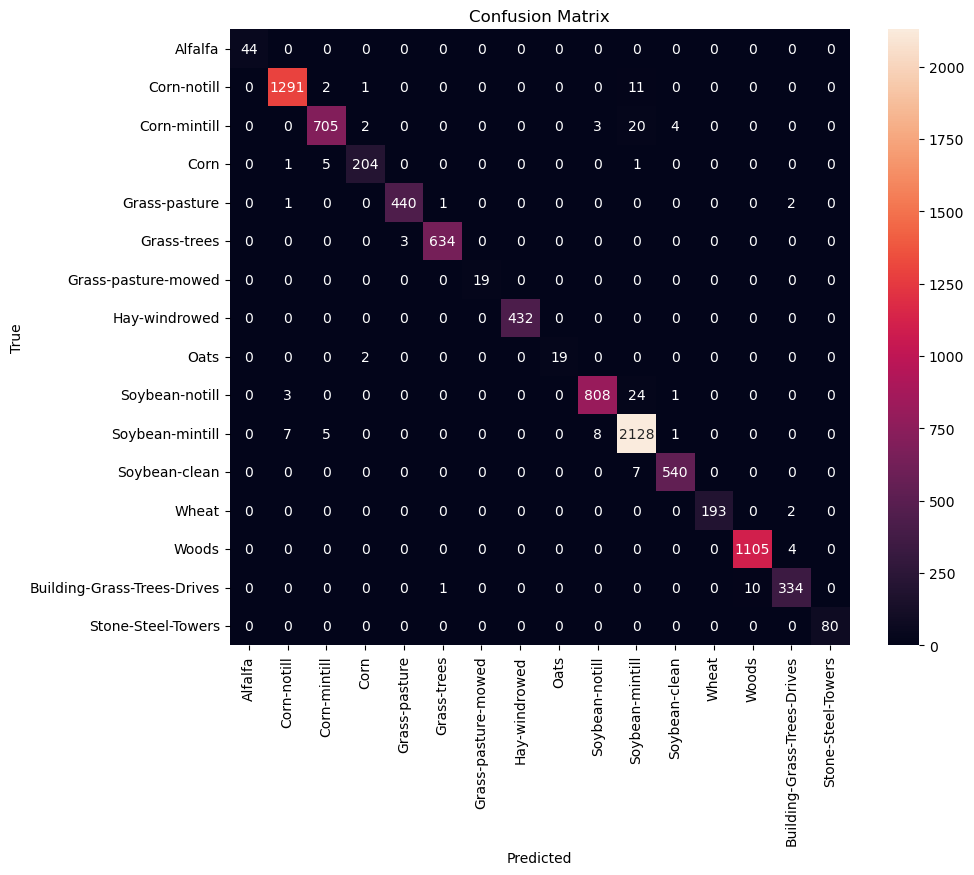

In [150]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.1)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

(0.0, 1.0, 0.0, 1.0)

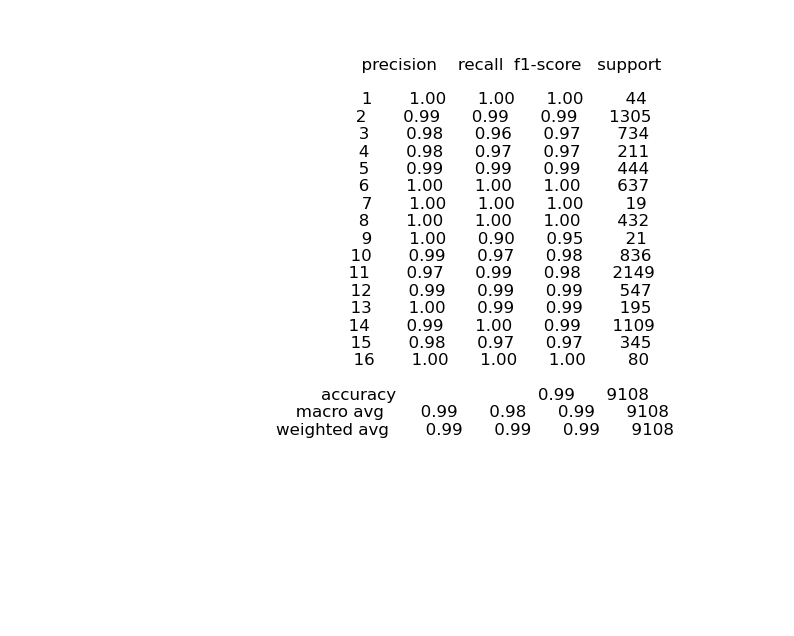

In [151]:
plt.figure(figsize=(10, 8))
plt.text(0.6, 0.6, report, fontsize=12, ha='center', va='center')
plt.axis('off')

In [152]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [153]:
y_test.value_counts()

11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

In [154]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.99      0.99      0.99      1305
           3       0.98      0.96      0.97       734
           4       0.98      0.97      0.97       211
           5       0.99      0.99      0.99       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00       432
           9       1.00      0.90      0.95        21
          10       0.99      0.97      0.98       836
          11       0.97      0.99      0.98      2149
          12       0.99      0.99      0.99       547
          13       1.00      0.99      0.99       195
          14       0.99      1.00      0.99      1109
          15       0.98      0.97      0.97       345
          16       1.00      1.00      1.00        80

    accuracy                           0.99      9108
   macro avg       0.99   

In [155]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 1.00, Samples = 44
Class 2: Accuracy = 0.99, Samples = 1305
Class 3: Accuracy = 0.96, Samples = 734
Class 4: Accuracy = 0.97, Samples = 211
Class 5: Accuracy = 0.99, Samples = 444
Class 6: Accuracy = 1.00, Samples = 637
Class 7: Accuracy = 1.00, Samples = 19
Class 8: Accuracy = 1.00, Samples = 432
Class 9: Accuracy = 0.90, Samples = 21
Class 10: Accuracy = 0.97, Samples = 836
Class 11: Accuracy = 0.99, Samples = 2149
Class 12: Accuracy = 0.99, Samples = 547
Class 13: Accuracy = 0.99, Samples = 195
Class 14: Accuracy = 1.00, Samples = 1109
Class 15: Accuracy = 0.97, Samples = 345
Class 16: Accuracy = 1.00, Samples = 80


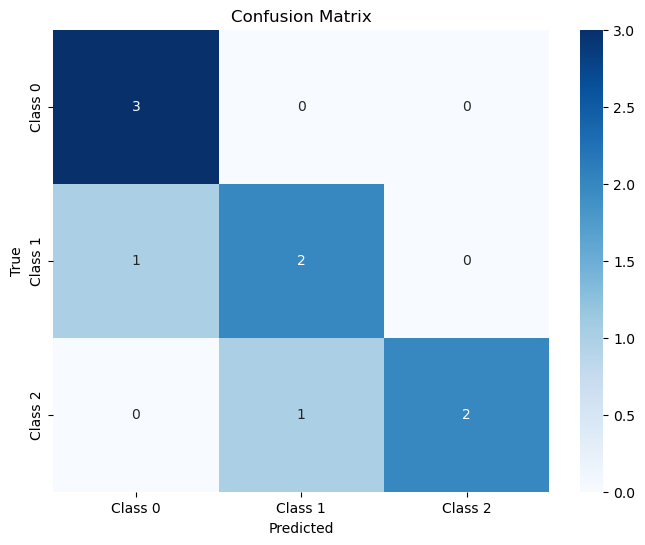

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Replace these with your actual ground truth and predicted labels
true_labels = [0, 1, 2, 0, 1, 2, 2, 0, 1]
predicted_labels = [0, 0, 2, 0, 1, 1, 2, 0, 1]

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [157]:
from sklearn.metrics import classification_report, accuracy_score

# Replace these with your actual ground truth and predicted labels
true_labels = [0, 1, 2, 0, 1, 2, 2, 0, 1]
predicted_labels = [0, 0, 2, 0, 1, 1, 2, 0, 1]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels)

# Print accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n')
print(class_report)

Accuracy: 0.78

Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.67      0.67      0.67         3
           2       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.81      0.78      0.77         9
weighted avg       0.81      0.78      0.77         9



In [158]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Example ground truth and predicted labels (replace with your own data)
y_true = np.array([1, 0, 2, 1, 1, 0, 2, 2, 0, 2])
y_pred = np.array([1, 0, 2, 1, 0, 1, 2, 2, 0, 2])

# Compute overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute classification report
class_names = ['Class 0', 'Class 1', 'Class 2']  # Replace with your class names
report = classification_report(y_true, y_pred, target_names=class_names)

# Compute per class accuracy
per_class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Display results
print("Overall Accuracy:", accuracy)
# print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("\nPer Class Accuracy:", per_class_accuracy)

Overall Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.67      0.67      0.67         3
     Class 1       0.67      0.67      0.67         3
     Class 2       1.00      1.00      1.00         4

    accuracy                           0.80        10
   macro avg       0.78      0.78      0.78        10
weighted avg       0.80      0.80      0.80        10


Per Class Accuracy: [0.66666667 0.66666667 1.        ]
